## SID: 10742495 Amaka Patience NWOKOLO CourseWork
## Big Data and Data Visualization 

In [1]:
# Setting up spark and importing  the relevant libraries
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *
conf = SparkConf().setMaster("local").setAppName("PySpark_feature_eng")
spark = SparkSession.builder.getOrCreate()
print(spark)

# import libraries for data preprocessing and visualization
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [2]:
# Set sqlContext from the Spark context
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

In [3]:
#checcking out the version of spark
print(spark.version)

3.1.2


In [4]:
# importing the csv file for the  analysis
HR_train = spark.read.csv('HR_train.csv', inferSchema = 'true', header = 'true')
HR_test = spark.read.csv('HR_test.csv', inferSchema = 'true', header = 'true')

Display the datatypes of each of the attribute in the dataset

In [5]:
HR_train.cache()
HR_train.printSchema()

root
 |-- enrollee_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- city_development_index: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- company_type: string (nullable = true)
 |-- last_new_job: string (nullable = true)
 |-- training_hours: integer (nullable = true)
 |-- target: double (nullable = true)



Display the first top 3 rows in my dataset

In [6]:
HR_train.show(3)

+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
|enrollee_id|    city|city_development_index|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|company_size|company_type|last_new_job|training_hours|target|
+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
|       8949|city_103|                  0.92|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|       >20|        null|        null|           1|            36|   1.0|
|      29725| city_40|    0.7759999999999999|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|        15|       50-99|     Pvt Ltd|          >4|            47|   0.0|
|    

Display the first top 5 in the dataset in a list format.

In [7]:
HR_train.head(3)

[Row(enrollee_id=8949, city='city_103', city_development_index=0.92, gender='Male', relevent_experience='Has relevent experience', enrolled_university='no_enrollment', education_level='Graduate', major_discipline='STEM', experience='>20', company_size=None, company_type=None, last_new_job='1', training_hours=36, target=1.0),
 Row(enrollee_id=29725, city='city_40', city_development_index=0.7759999999999999, gender='Male', relevent_experience='No relevent experience', enrolled_university='no_enrollment', education_level='Graduate', major_discipline='STEM', experience='15', company_size='50-99', company_type='Pvt Ltd', last_new_job='>4', training_hours=47, target=0.0),
 Row(enrollee_id=11561, city='city_21', city_development_index=0.624, gender=None, relevent_experience='No relevent experience', enrolled_university='Full time course', education_level='Graduate', major_discipline='STEM', experience='5', company_size=None, company_type=None, last_new_job='never', training_hours=83, target=0

To View the dataset in a more clear form using pandas

In [8]:
pd.DataFrame(HR_train.take(5), columns=HR_train.columns).transpose()

,0,1,2,3,4
enrollee_id,8949,29725,11561,33241,666
city,city_103,city_40,city_21,city_115,city_162
city_development_index,0.92,0.776,0.624,0.789,0.767
gender,Male,Male,None,None,Male
relevent_experience,Has relevent experience,No relevent experience,No relevent experience,No relevent experience,Has relevent experience
enrolled_university,no_enrollment,no_enrollment,Full time course,None,no_enrollment
education_level,Graduate,Graduate,Graduate,Graduate,Masters
major_discipline,STEM,STEM,STEM,Business Degree,STEM
experience,>20,15,5,<1,>20
company_size,None,50-99,None,None,50-99


Count and return the value in the dataset

In [9]:
HR_train.count()

19158

Display the statistical summary of the attribute of the dataset

In [10]:
for col in HR_train.columns:
    HR_train.describe([col]).show()

+-------+------------------+
|summary|       enrollee_id|
+-------+------------------+
|  count|             19158|
|   mean|16875.358179350664|
| stddev| 9616.292592160924|
|    min|                 1|
|    max|             33380|
+-------+------------------+

+-------+-------+
|summary|   city|
+-------+-------+
|  count|  19158|
|   mean|   null|
| stddev|   null|
|    min| city_1|
|    max|city_99|
+-------+-------+

+-------+----------------------+
|summary|city_development_index|
+-------+----------------------+
|  count|                 19158|
|   mean|    0.8288480008351684|
| stddev|   0.12336175686054515|
|    min|   0.44799999999999995|
|    max|    0.9490000000000001|
+-------+----------------------+

+-------+------+
|summary|gender|
+-------+------+
|  count| 14650|
|   mean|  null|
| stddev|  null|
|    min|Female|
|    max| Other|
+-------+------+

+-------+--------------------+
|summary| relevent_experience|
+-------+--------------------+
|  count|               19158|

To continue the analysis I drop the attribute which are not contributing much to the construction of the machine learning model

In [11]:
HR_train = HR_train.drop("company_size",'company_type','city', 'city_development_index', 'last_new_job', 'training_hours')

In [12]:
HR_train.printSchema()

root
 |-- enrollee_id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: string (nullable = true)
 |-- target: double (nullable = true)



In [13]:
HR_train.show()

+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|enrollee_id|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|target|
+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|       8949|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|       >20|   1.0|
|      29725|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|        15|   0.0|
|      11561|  null|No relevent exper...|   Full time course|       Graduate|            STEM|         5|   0.0|
|      33241|  null|No relevent exper...|               null|       Graduate| Business Degree|        <1|   1.0|
|        666|  Male|Has relevent expe...|      no_enrollment|        Masters|            STEM|       >20|   0.0|
|      21651|  null|Has relevent expe...|   Part time course|       Graduate|            STEM|  

In [14]:
#Count the value of 'with null values' in every column
for col in HR_train.columns:
     print(col, "\t", "with null values: ", HR_train.filter(HR_train[col].isNull()).count())

enrollee_id 	 with null values:  0
gender 	 with null values:  4508
relevent_experience 	 with null values:  0
enrolled_university 	 with null values:  386
education_level 	 with null values:  460
major_discipline 	 with null values:  2813
experience 	 with null values:  65
target 	 with null values:  0


In [15]:
# HR_train = HR_train.na.fill({"gender": "female"}) \
#     .show()

In [15]:
def mode_of_pyspark_columns(HR_train, cat_col_list, verbose=False):
    col_with_mode=[]
    for col in cat_col_list:
        #Filter null
        HR_train = HR_train.filter(HR_train[col].isNull()==False)
        #Find unique_values_with_count
        unique_classes = HR_train.select(col).distinct().rdd.map(lambda x: x[0]).collect()
        unique_values_with_count=[]
        for uc in unique_classes:
             unique_values_with_count.append([uc, HR_train.filter(HR_train[col]==uc).count()])
        #sort unique values w.r.t their count values
        sorted_unique_values_with_count= sorted(unique_values_with_count, key = lambda x: x[1], reverse =True)
        
        if (verbose==True): print(col, sorted_unique_values_with_count, " and mode is ", sorted_unique_values_with_count[0][0])
        col_with_mode.append([col, sorted_unique_values_with_count[0][0]])
    return col_with_mode

In [16]:
#Validate it
cat_col_list=['gender','enrolled_university', 'education_level', 'major_discipline']
mode_of_pyspark_columns(HR_train, cat_col_list, verbose=True)

gender [['Male', 13221], ['Female', 1238], ['Other', 191]]  and mode is  Male
enrolled_university [['no_enrollment', 10982], ['Full time course', 2576], ['Part time course', 879]]  and mode is  no_enrollment
education_level [['Graduate', 8929], ['Masters', 3294], ['High School', 1468], ['Phd', 327], ['Primary School', 207]]  and mode is  Graduate
major_discipline [['STEM', 11067], ['Humanities', 549], ['Other', 288], ['Business Degree', 254], ['Arts', 201], ['No Major', 180]]  and mode is  STEM


[['gender', 'Male'],
 ['enrolled_university', 'no_enrollment'],
 ['education_level', 'Graduate'],
 ['major_discipline', 'STEM']]

In [17]:
HR_train.show()

+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|enrollee_id|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|target|
+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|       8949|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|       >20|   1.0|
|      29725|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|        15|   0.0|
|      11561|  null|No relevent exper...|   Full time course|       Graduate|            STEM|         5|   0.0|
|      33241|  null|No relevent exper...|               null|       Graduate| Business Degree|        <1|   1.0|
|        666|  Male|Has relevent expe...|      no_enrollment|        Masters|            STEM|       >20|   0.0|
|      21651|  null|Has relevent expe...|   Part time course|       Graduate|            STEM|  

In [18]:

#Find the avg of all numeric columns
from pyspark.sql.functions import avg

def mean_of_pyspark_columns(df, numeric_cols, verbose=False):
    col_with_mean=[]
    for col in numeric_cols:
        mean_value = df.select(avg(df[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        
        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        col_with_mean.append([col, res[0]])    
    return col_with_mean

In [19]:

#Validate it
numeric_cols=['experience']    
mean_of_pyspark_columns(HR_train, numeric_cols, verbose=True)

avg(experience) 	 8.101799149492967


[['experience', 8.101799149492967]]

In [ ]:
# df.na.fill(value=0,subset=["population"]).show()

In [20]:
#Fill missing values for mode
from pyspark.sql.functions import when, lit

def fill_missing_with_mode(HR_train, cat_col_list):
    col_with_mode =mode_of_pyspark_columns(HR_train, cat_col_list)
    
    for col, mode in col_with_mode:
        HR_train = HR_train.withColumn(col, when(HR_train[col].isNull()==True, 
        lit(mode)).otherwise(HR_train[col]))
        
    return HR_train

In [22]:
#Now this is the time to literally consume the fill_missing_with_mode
cat_col_list=['gender','enrolled_university', 'education_level', 'major_discipline']
HR_train= fill_missing_with_mode(HR_train, cat_col_list)

In [23]:
#Fill missing values for mean
from pyspark.sql.functions import when, lit

def fill_missing_with_mean(HR_train, numeric_cols):
    col_with_mean = mean_of_pyspark_columns(HR_train, numeric_cols) 
    
    for col, mean in col_with_mean:
        HR_train = HR_train.withColumn(col, when(HR_train[col].isNull()==True, 
        lit(mean)).otherwise(HR_train[col]))
        
    return HR_train

In [24]:
#Now this is the time to literally consume the fill_missing_with_mean

numeric_cols=['experience']     
HR_train = fill_missing_with_mean(HR_train, numeric_cols)

In [25]:
#again validate that our awesome functions worked or not on true dataframe that is 'df'
for col in HR_train.columns:
     HR_train.describe([col]).show()

+-------+------------------+
|summary|       enrollee_id|
+-------+------------------+
|  count|             19158|
|   mean|16875.358179350664|
| stddev| 9616.292592160924|
|    min|                 1|
|    max|             33380|
+-------+------------------+

+-------+------+
|summary|gender|
+-------+------+
|  count| 19158|
|   mean|  null|
| stddev|  null|
|    min|Female|
|    max| Other|
+-------+------+

+-------+--------------------+
|summary| relevent_experience|
+-------+--------------------+
|  count|               19158|
|   mean|                null|
| stddev|                null|
|    min|Has relevent expe...|
|    max|No relevent exper...|
+-------+--------------------+

+-------+-------------------+
|summary|enrolled_university|
+-------+-------------------+
|  count|              19158|
|   mean|               null|
| stddev|               null|
|    min|   Full time course|
|    max|      no_enrollment|
+-------+-------------------+

+-------+---------------+
|summar

In [26]:
HR_train.show()

+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|enrollee_id|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|target|
+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|       8949|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|       >20|   1.0|
|      29725|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|        15|   0.0|
|      11561|  Male|No relevent exper...|   Full time course|       Graduate|            STEM|         5|   0.0|
|      33241|  Male|No relevent exper...|      no_enrollment|       Graduate| Business Degree|        <1|   1.0|
|        666|  Male|Has relevent expe...|      no_enrollment|        Masters|            STEM|       >20|   0.0|
|      21651|  Male|Has relevent expe...|   Part time course|       Graduate|            STEM|  

In [40]:
HR_train = HR_train.withColumn('experience', regexp_replace('experience', '<', '').cast('float'))

In [41]:
HR_train = HR_train.withColumn('experience', regexp_replace('experience', '>', '').cast('float'))

In [42]:
HR_train.printSchema()
HR_train.show()

root
 |-- enrollee_id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: float (nullable = true)
 |-- target: double (nullable = true)

+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|enrollee_id|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|target|
+-----------+------+--------------------+-------------------+---------------+----------------+----------+------+
|       8949|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|      20.0|   1.0|
|      29725|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|      15.0|   0.0|
|      11561|  Male|No relevent exper...|   Full time course|       Gra

In [45]:
HR_train = HR_train.select('enrollee_id','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','target')
cols = HR_train.columns

Building the Machine Learning Model

In [27]:
from pyspark.ml.feature import OneHotEncoder

In [43]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
categoricalColumns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'target', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['experience']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [46]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(HR_train)
HR_train = pipelineModel.transform(HR_train)
selectedCols = ['label', 'features'] + cols
HR_train = HR_train.select(selectedCols)
HR_train.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- enrollee_id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: float (nullable = true)
 |-- target: double (nullable = true)



In [48]:
pd.DataFrame(HR_train.take(10), columns=HR_train.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
label,1,0,0,1,0,1,0,1,1,0
features,"(1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
enrollee_id,8949,29725,11561,33241,666,21651,28806,402,27107,699
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
relevent_experience,Has relevent experience,No relevent experience,No relevent experience,No relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience
enrolled_university,no_enrollment,no_enrollment,Full time course,no_enrollment,no_enrollment,Part time course,no_enrollment,no_enrollment,no_enrollment,no_enrollment
education_level,Graduate,Graduate,Graduate,Graduate,Masters,Graduate,High School,Graduate,Graduate,Graduate
major_discipline,STEM,STEM,STEM,Business Degree,STEM,STEM,STEM,STEM,STEM,STEM
experience,20,15,5,1,20,11,5,13,7,17
target,1,0,0,1,0,1,0,1,1,0


In [50]:
train, test = HR_train.randomSplit([0.8, 0.2], seed = 123)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 15284
Test Dataset Count: 3874


In [51]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

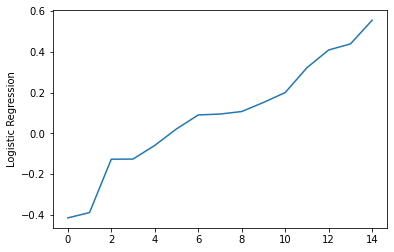

In [54]:
JobChange = ny.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Logistic Regression')
plt.show()

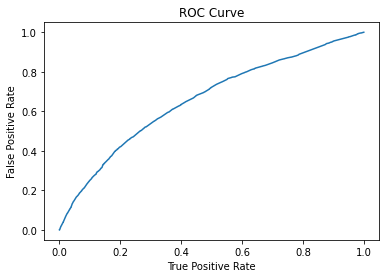

Training set areaUnderROC: 0.6575290250492387


In [55]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Testing the modelled on the test dataset

In [77]:
predictions = lrModel.transform(test)
predictions.select('gender', 'education_level', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+------+---------------+-----+--------------------+----------+--------------------+
|gender|education_level|label|       rawPrediction|prediction|         probability|
+------+---------------+-----+--------------------+----------+--------------------+
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475223...|
|  Male|       Graduate|  0.0|[0.69013085179167...|       0.0|[0.66599603475

In [78]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.6544518474741016


DECISION TREE



In [81]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
# data = spark.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(HR_train)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(HR_train)

# Split the data into training and test sets (30% held out for testing)
#(trainingData, testData) = HR_train.randomSplit([0.8, 0.2])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, HR_train])

# # Train model.  This also runs the indexers.
# model = pipeline.fit(train)

# Make predictions.
predictions = model.transform(test)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         0.0|(15,[0,2,3,5,9,14...|
|       1.0|         0.0|(15,[0,2,3,5,9,14...|
|       1.0|         0.0|(15,[0,2,3,5,9,14...|
|       1.0|         0.0|(15,[0,2,3,5,9,14...|
|       1.0|         0.0|(15,[0,2,3,5,9,14...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.239023 
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_d22368ce53a0, depth=5, numNodes=25, numClasses=2, numFeatures=15


In [83]:
# Train model.  This also runs the indexers.
model = pipeline.fit(train)

In [84]:
# Make predictions.
predictions = model.transform(test)

# Select example rows to display.
predictions.select('gender', 'education_level', 'label', 'rawPrediction', 'prediction', 'probability').show(5)

+------+---------------+-----+---------------+----------+--------------------+
|gender|education_level|label|  rawPrediction|prediction|         probability|
+------+---------------+-----+---------------+----------+--------------------+
|  Male|       Graduate|  0.0|[3306.0,1383.0]|       0.0|[0.70505438259756...|
|  Male|       Graduate|  0.0|[3306.0,1383.0]|       0.0|[0.70505438259756...|
|  Male|       Graduate|  0.0|[3306.0,1383.0]|       0.0|[0.70505438259756...|
|  Male|       Graduate|  0.0|[3306.0,1383.0]|       0.0|[0.70505438259756...|
|  Male|       Graduate|  0.0|[3306.0,1383.0]|       0.0|[0.70505438259756...|
+------+---------------+-----+---------------+----------+--------------------+
only showing top 5 rows



In [85]:
JobChange = ny.sort(treeModel.coefficients)
plt.plot(JobChange)
plt.ylabel('Decision Tree')
plt.show()

AttributeError: 'DecisionTreeClassificationModel' object has no attribute 'coefficients'

To use the HR_test. we need to ensure it is clean and ok

In [56]:
HR_test.printSchema()

root
 |-- enrollee_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- city_development_index: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- company_type: string (nullable = true)
 |-- last_new_job: string (nullable = true)
 |-- training_hours: integer (nullable = true)



In [57]:
HR_test = HR_test.drop("company_size",'company_type','city', 'city_development_index', 'last_new_job', 'training_hours')

In [58]:
HR_test

DataFrame[enrollee_id: int, gender: string, relevent_experience: string, enrolled_university: string, education_level: string, major_discipline: string, experience: string]

In [59]:
for col in HR_test.columns:
    HR_test.describe([col]).show()

+-------+-----------------+
|summary|      enrollee_id|
+-------+-----------------+
|  count|             2129|
|   mean|16861.61484264913|
| stddev|9576.846028542162|
|    min|                3|
|    max|            33353|
+-------+-----------------+

+-------+------+
|summary|gender|
+-------+------+
|  count|  1621|
|   mean|  null|
| stddev|  null|
|    min|Female|
|    max| Other|
+-------+------+

+-------+--------------------+
|summary| relevent_experience|
+-------+--------------------+
|  count|                2129|
|   mean|                null|
| stddev|                null|
|    min|Has relevent expe...|
|    max|No relevent exper...|
+-------+--------------------+

+-------+-------------------+
|summary|enrolled_university|
+-------+-------------------+
|  count|               2098|
|   mean|               null|
| stddev|               null|
|    min|   Full time course|
|    max|      no_enrollment|
+-------+-------------------+

+-------+---------------+
|summary|educati

In [60]:
#Count the value of 'with null values' in every column
for col in HR_test.columns:
     print(col, "\t", "with null values: ", HR_test.filter(HR_test[col].isNull()).count())

enrollee_id 	 with null values:  0
gender 	 with null values:  508
relevent_experience 	 with null values:  0
enrolled_university 	 with null values:  31
education_level 	 with null values:  52
major_discipline 	 with null values:  312
experience 	 with null values:  5


In [63]:
def mode_of_pyspark_columns(HR_test, cat_col_list, verbose=False):
    col_with_mode=[]
    for col in cat_col_list:
        #Filter null
        HR_test = HR_test.filter(HR_test[col].isNull()==False)
        #Find unique_values_with_count
        unique_classes = HR_test.select(col).distinct().rdd.map(lambda x: x[0]).collect()
        unique_values_with_count=[]
        for uc in unique_classes:
             unique_values_with_count.append([uc, HR_test.filter(HR_test[col]==uc).count()])
        #sort unique values w.r.t their count values
        sorted_unique_values_with_count= sorted(unique_values_with_count, key = lambda x: x[1], reverse =True)
        
        if (verbose==True): print(col, sorted_unique_values_with_count, " and mode is ", sorted_unique_values_with_count[0][0])
        col_with_mode.append([col, sorted_unique_values_with_count[0][0]])
    return col_with_mode

In [64]:
#Validate it
cat_col_list=['gender','enrolled_university', 'education_level', 'major_discipline']
mode_of_pyspark_columns(HR_test, cat_col_list, verbose=True)

gender [['Male', 1460], ['Female', 137], ['Other', 24]]  and mode is  Male
enrolled_university [['no_enrollment', 1201], ['Full time course', 294], ['Part time course', 108]]  and mode is  no_enrollment
education_level [['Graduate', 970], ['Masters', 380], ['High School', 167], ['Phd', 42], ['Primary School', 21]]  and mode is  Graduate
major_discipline [['STEM', 1230], ['Humanities', 67], ['Other', 30], ['Business Degree', 29], ['No Major', 18], ['Arts', 16]]  and mode is  STEM


[['gender', 'Male'],
 ['enrolled_university', 'no_enrollment'],
 ['education_level', 'Graduate'],
 ['major_discipline', 'STEM']]

In [67]:

#Find the avg of all numeric columns
from pyspark.sql.functions import avg

def mean_of_pyspark_columns(HR_test, numeric_cols, verbose=False):
    col_with_mean=[]
    for col in numeric_cols:
        mean_value = HR_test.select(avg(HR_test[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        
        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        col_with_mean.append([col, res[0]])    
    return col_with_mean

In [68]:

#Validate it
numeric_cols=['experience']    
mean_of_pyspark_columns(HR_test, numeric_cols, verbose=True)

avg(experience) 	 8.050389922015597


[['experience', 8.050389922015597]]

In [74]:
#Fill missing values for mode
from pyspark.sql.functions import when, lit

def fill_missing_with_mode(HR_test, cat_col_list):
    col_with_mode =mode_of_pyspark_columns(HR_test, cat_col_list)
    
    for col, mode in col_with_mode:
        HR_test = HR_test.withColumn(col, when(HR_test[col].isNull()==True, 
        lit(mode)).otherwise(HR_test[col]))
        
    return HR_test

In [75]:
#Now this is the time to literally consume the fill_missing_with_mode
cat_col_list=['gender','enrolled_university', 'education_level', 'major_discipline']
HR_test= fill_missing_with_mode(HR_test, cat_col_list)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 152 in stage 388.0 failed 1 times, most recent failure: Lost task 152.0 in stage 388.0 (TID 4463) (LAPTOP-1UBS8G8S executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.lang.NegativeArraySizeException
	at org.apache.spark.security.SocketAuthHelper.readUtf8(SocketAuthHelper.scala:104)
	at org.apache.spark.security.SocketAuthHelper.authClient(SocketAuthHelper.scala:57)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:175)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.lang.NegativeArraySizeException
	at org.apache.spark.security.SocketAuthHelper.readUtf8(SocketAuthHelper.scala:104)
	at org.apache.spark.security.SocketAuthHelper.authClient(SocketAuthHelper.scala:57)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:175)
	... 14 more


In [72]:
#Fill missing values for mean
from pyspark.sql.functions import when, lit

def fill_missing_with_mean(HR_test, numeric_cols):
    col_with_mean = mean_of_pyspark_columns(HR_test, numeric_cols) 
    
    for col, mean in col_with_mean:
        HR_test = HR_test.withColumn(col, when(HR_test[col].isNull()==True, 
        lit(mean)).otherwise(HR_test[col]))
        
    return HR_test

In [73]:
#Now this is the time to literally consume the fill_missing_with_mean

numeric_cols=['experience']     
HR_test = fill_missing_with_mean(HR_test, numeric_cols)

In [ ]:
HR_test = HR_test.withColumn('experience', regexp_replace('experience', '>', '').cast('float'))
HR_test = HR_test.withColumn('experience', regexp_replace('experience', '<', '').cast('float'))